2.5773007710693174
0.9977122805766738


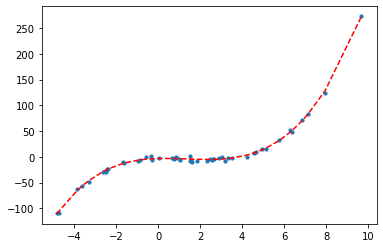

In [39]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 50)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 50)


x = x[:, np.newaxis]
y = y[:, np.newaxis]

poly_features = PolynomialFeatures(degree=5)

model = LinearRegression()

x_poly = poly_features.fit_transform(x)

model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))

r2 = r2_score(y, y_poly_pred)

print(rmse)
print(r2)


plt.scatter(x,y, s=10)

x, y = zip(*sorted(zip(x,y_poly_pred)))

plt.plot(x,y, 'r--')

plt.show()
               


4.075948295894455
0.8227792735928942


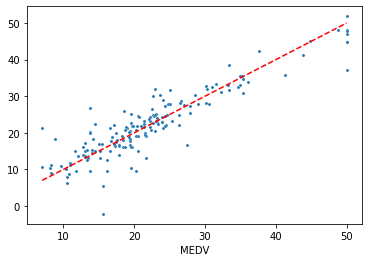

In [57]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston

boston = load_boston()

bos = pd.DataFrame(boston.data)


bos.columns = boston.feature_names



bos['MEDV'] = boston.target


x = bos.drop('MEDV', axis=1)

y = bos['MEDV']

poly_features = PolynomialFeatures(degree=2)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 5)

X_test_trans = poly_features.fit_transform(X_test)
X_train_trans = poly_features.fit_transform(X_train)


model = LinearRegression()

model.fit(X_train_trans, Y_train)

Y_Pred = model.predict(X_test_trans)

rmse = np.sqrt(mean_squared_error(Y_test,Y_Pred ))

r2 = r2_score(Y_test,Y_Pred)

print(rmse)
print(r2)

bos.corr()                         
            
sns.scatterplot(x=Y_test, y=Y_Pred, s=10)

plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], 'r--' )

plt.show()
                                   

6.304667565743334
0.575984664998785


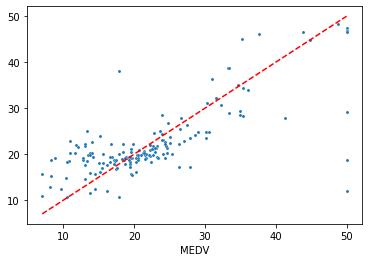

[4.519 4.619 4.719 4.819 4.919 5.019 5.119 5.219 5.319 5.419 5.519 5.619
 5.719 5.819 5.919 6.019 6.119 6.219 6.319 6.419 6.519 6.619 6.719 6.819
 6.919 7.019 7.119 7.219 7.319 7.419 7.519 7.619 7.719 7.819 7.919 8.019
 8.119 8.219 8.319]
[10.9137832  10.69307656 10.77003656 11.10689637 11.65648955 12.36568436
 13.17927644 14.04401955 14.91244371 15.74611343 16.5180197  17.21387826
 17.83221995 18.38329631 18.88697194 19.3699158  19.86251326 20.39597907
 21.00013312 21.70219396 22.52673956 23.49669414 24.63484802 25.96506142
 27.5120182  29.29829168 31.33767622 33.6243627  36.11869263 38.73196876
 41.31502437 43.65771651 45.50853014 46.62394523 46.85429382 46.26357126
 45.26084184 44.6842513  45.71662283]


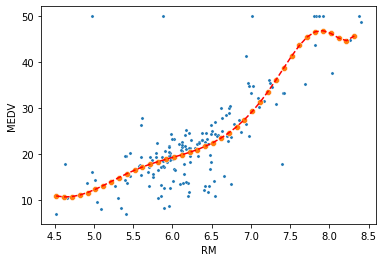

In [69]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston

boston = load_boston()

bos = pd.DataFrame(boston.data)


bos.columns = boston.feature_names



bos['MEDV'] = boston.target


x = bos.drop('MEDV', axis=1)
x = x[['RM']]
y = bos['MEDV']

poly_features = PolynomialFeatures(degree=20)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 5)

X_test_trans = poly_features.fit_transform(X_test)
X_train_trans = poly_features.fit_transform(X_train)


model = LinearRegression()

model.fit(X_train_trans, Y_train)

Y_Pred = model.predict(X_test_trans)

rmse = np.sqrt(mean_squared_error(Y_test,Y_Pred ))

r2 = r2_score(Y_test,Y_Pred)

print(rmse)
print(r2)

bos.corr()                         
            
sns.scatterplot(x=Y_test, y=Y_Pred, s=10)

plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], 'r--' )

plt.show()
                
    
x_sequence = np.arange(X_test['RM'].min(), X_test['RM'].max(), .1)
y_sequence = model.predict(poly_features.fit_transform(np.reshape(x_sequence, (-1,1))))

print(x_sequence)
print(y_sequence)

sns.scatterplot(x=X_test['RM'], y=Y_test, s=10)
sns.scatterplot(x=x_sequence, y=y_sequence)

plt.plot(x_sequence, y_sequence, 'r--')


plt.show()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
{(1, 50), (0, 50), (2, 50)}
0.72


C:\Users\David\anaconda3\envs\MLEnv21\lib\site-packages\ipykernel_launcher.py:50: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


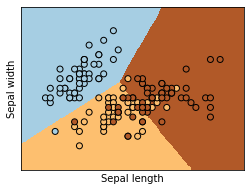

In [95]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()

print(iris.keys())
#print(iris.DESCR)
print(iris.feature_names)

#print(iris.target)

uniques, counts = np.unique(iris.target, return_counts=True)

print(set(zip(uniques,counts)))

df = pd.DataFrame(iris.data)

df.columns = ['sl', 'sw', 'pl', 'pw']


X = iris.data[:, :2]
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 8)

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

acc = accuracy_score(Y_test, Y_pred)

print (acc)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
